## Create sphere image template for CBICQC
Mike Tyszka
2019-06-25 JMT From scratch

In [32]:
%matplotlib inline

import numpy as np
from scipy.ndimage.filters import gaussian_filter
import nibabel as nb
import matplotlib.pyplot as plt

In [40]:
# Phantom and image dimensions
r_phantom = 82.5
FOV = 192
n = 64
vox = FOV / float(n)

# Setup coordinate system
xv = (np.arange(0, n) - 0.5 * n) * vox
xm, ym, zm = np.meshgrid(xv, xv, xv)
r = np.sqrt(xm**2 + ym**2 + zm**2)

# Create binary image
img = np.zeros([n, n, n])
img[r < r_phantom] = 1000.0

In [42]:
# Gaussian blur (sigma = 1)
img_g = gaussian_filter(img, sigma=1.0)

1000.0000000000003

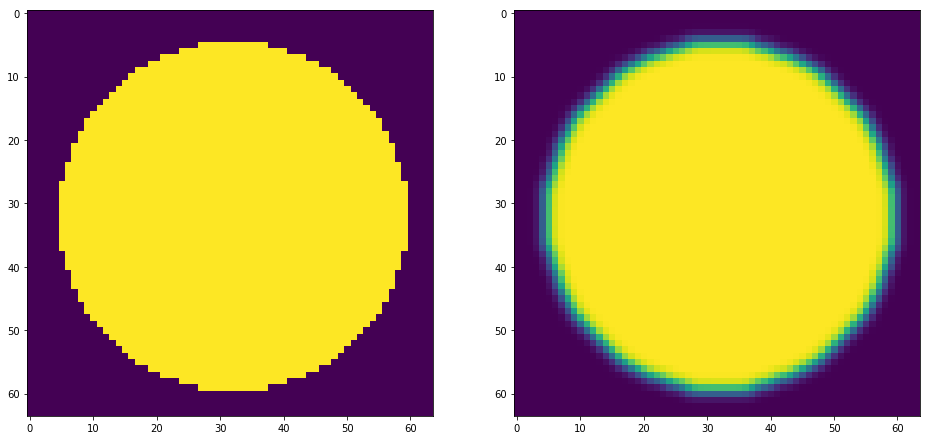

In [43]:
plt.subplots(1, 2, figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(img[:, :, 32])
plt.subplot(1, 2, 2)
plt.imshow(img_g[:, :, 32])

plt.show()

In [46]:
affine = np.diag([vox, vox, vox, 1])
nii = nb.Nifti1Image(np.uint16(img_g), affine)
nii.to_filename('QCSphere.nii.gz')